In [1]:
import pandas as pd
import numpy as np
import os
import re
from csv import DictReader
# from matplotlib import pyplot as plt
import collections
from tqdm import tqdm
import json

import Bio
from Bio import SeqUtils

import pymol
from pymol import CmdException

import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

/opt/anaconda3/envs/dror_x64/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
prop = "s2calc"

In [4]:
print(df.shape)
df = df[(df[prop]>-0.1) & (df[prop]<1.1)].copy()
print(df.shape)

(298679, 19)
(284582, 19)


In [5]:
df['res_type'] = df.qFit_resn.astype('category')
df['op'] = df.s2calc.astype('float')

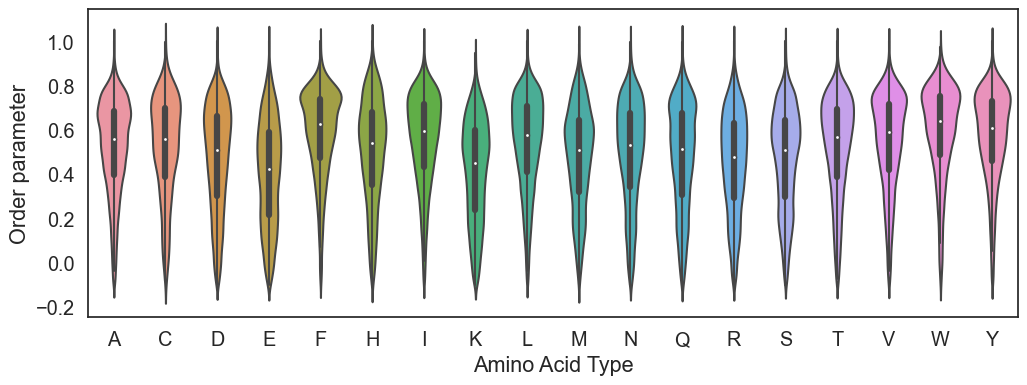

In [17]:
# sns.set(font_scale=10)
sns.set(rc={'figure.figsize':(12,4)},font_scale=1.3)
sns.set_style(style='white')
sns_plot = sns.violinplot(data=df, x="res_type", y="op")
fig = sns_plot.get_figure()
sns_plot.set(xlabel='Amino Acid Type', ylabel='Order parameter')
fig.savefig("s2calc_by_residue.png",bbox_inches="tight",dpi=500)

In [29]:
len(list(set(df.pdb_id)))

1034

In [30]:
df

,label,pdb_id,qFit_chain,pdb_chain,qFit_resi,pdb_resi,qFit_resn,pdb_resn,s2ang,s2ortho,...,resolution,pdb_label,ss,sasa,CA_b_factor,volume,s2ortho_norm,s2calc_norm,res_type,op
0,5al1_A_2,5al1,A,A,2,953,T,T,1.000000,0.431841,...,1.75,5al1_A_953,NaN,25.513120,22.730000,122.1,0.560900,0.560900,T,0.431841
1,5al1_A_3,5al1,A,A,3,954,I,I,0.746558,0.148917,...,1.75,5al1_A_954,S,91.668153,22.969999,168.8,0.195465,0.145926,I,0.111175
2,5al1_A_4,5al1,A,A,4,955,L,L,0.997921,0.473135,...,1.75,5al1_A_955,S,66.907184,20.500000,167.9,0.554244,0.553092,L,0.472151
3,5al1_A_5,5al1,A,A,5,956,I,I,0.958169,0.396587,...,1.75,5al1_A_956,S,77.230186,22.690001,168.8,0.514203,0.492693,I,0.379997
4,5al1_A_6,5al1,A,A,6,957,D,D,0.380293,0.271293,...,1.75,5al1_A_957,S,80.737338,25.559999,124.5,0.396243,0.150688,D,0.103171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298671,1e3f_B_108,1e3f,B,B,108,117,S,S,0.282075,0.165519,...,1.75,1e3f_B_117,S,30.389711,27.370001,99.1,0.258871,0.073021,S,0.046689
298672,1e3f_B_109,1e3f,B,B,109,118,T,T,0.953874,0.358029,...,1.75,1e3f_B_118,S,0.587445,26.980000,122.1,0.551978,0.526518,T,0.341515
298673,1e3f_B_110,1e3f,B,B,110,119,T,T,0.354667,0.033219,...,1.75,1e3f_B_119,S,52.477385,27.480000,122.1,0.052163,0.018500,T,0.011782
298674,1e3f_B_111,1e3f,B,B,111,120,A,A,1.000000,0.221347,...,1.75,1e3f_B_120,S,9.904657,25.250000,91.5,0.319372,0.319372,A,0.221347
